In [7]:
import numpy as np
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

from typing import Optional, List

In [8]:
connection_matrix = np.array([[0,1,0,0,0,0,0,0,0,0],
                              [0,0,1,1,0,0,0,0,0,0],
                              [0,0,0,0,1,1,0,0,0,0],
                              [0,0,0,0,1,1,0,0,0,0],
                              [0,0,0,0,0,0,1,1,0,1],
                              [0,1,0,0,0,0,1,1,0,1],
                              [0,0,0,0,0,0,0,0,0,0],
                              [0,0,0,0,0,0,0,0,1,0],
                              [0,0,0,0,0,0,0,0,0,0],
                              [0,0,0,0,0,0,0,0,0,0]])

In [9]:
graph = nx.from_numpy_array(connection_matrix, create_using=nx.DiGraph)
names = {i:chr(ord('A')+i ) for i in graph.nodes}
graph = nx.relabel_nodes(graph, names)

# Set vertex (node) data:
vertex_colors = {n:'yellow'for n in graph.nodes}
nx.set_node_attributes(graph, vertex_colors, 'color')

vertex_distances = {n : np.inf for n in graph.nodes}
nx.set_node_attributes(graph, vertex_distances, 'distance')

vertex_parents = {n: None for n in graph.nodes}
nx.set_node_attributes(graph, vertex_parents, 'parent')

vertex_times = {n: (0,0) for n in graph.nodes}
nx.set_node_attributes(graph, vertex_times, 'times')

In [10]:
def setup_graph(connection_matrix: np.array):
    """Setup a graph with inital properties
    """ 

    graph = nx.from_numpy_array(connection_matrix, create_using=nx.DiGraph)
    names = {i:chr(ord('A')+i ) for i in graph.nodes}
    graph = nx.relabel_nodes(graph, names)

    # Set vertex (node) data:
    vertex_colors = {n:'yellow'for n in graph.nodes}
    nx.set_node_attributes(graph, vertex_colors, 'color')

    vertex_distances = {n : np.inf for n in graph.nodes}
    nx.set_node_attributes(graph, vertex_distances, 'distance')

    vertex_parents = {n: None for n in graph.nodes}
    nx.set_node_attributes(graph, vertex_parents, 'parent')

    vertex_times = {n: (0,0) for n in graph.nodes}
    nx.set_node_attributes(graph, vertex_times, 'times')

    return graph


In [11]:

def draw_graph(graph: nx.Graph,focus_node: str, ax: plt.axes):
        """Function that draws this specific graph
         -"""
        # fig, ax = plt.subplots()
        layout = {'A': np.array([-0.9,0.0]),
                'B': np.array([-0.7, 0.0]), 
                'C':np.array([-0.5,0.5]),
                'D': np.array([-0.5, -0.5]),
                'E': np.array([-0.2, 0.5]), 
                'F': np.array([-0.2, -0.55]),
                'G': np.array([0.0, 0.5]), 
                'H': np.array([0.0, -0.45]),
                'I': np.array([0.3, 0.5]), 
                'J': np.array([0.3, -0.5])
                }

        node_colors = [graph.nodes[n]['color'] if n != focus_node else 'red' for n in graph]
        nx.draw_networkx_nodes(graph, pos= layout, node_color=node_colors, ax = ax) 
        nx.draw_networkx_labels(graph, pos =layout,font_color='black', ax = ax)
        nx.draw_networkx_edges(graph, layout, edge_color='black', ax = ax)


def set_node_color(graph, color, node):
    nx.set_node_attributes(graph, {node: {'color': color}})

def set_node_distance(graph, distance, node):
      nx.set_node_attributes(graph, {node: {'distance':distance}})

def set_node_parent(graph, parent, node):
      nx.set_node_attributes(graph, {node: {'parent': parent}})


In [12]:


def draw_bfs_search(graph: nx.graph, axs: List[plt.axes]):
    """Function running a bfs algorithm over a graph,
    and saving a matplotlib plot for each search step.
    parameters:
        graph[networkx.graph] : Graph on which to perfomr bfs search
        ax[matplotlib.pyplot.axes]: axes object on which to attach sublot of search step. 
    """ 
    
    queue = deque()

    init_node = 'A'
    queue.append(init_node) # initial node
    set_node_color(graph, 'grey', init_node)
    set_node_distance(graph,0.0, init_node)

    figure_count = 0

    while len(queue) > 0:
        vertex = queue.pop()
        for child in graph.successors(vertex):
            if graph.nodes[child]['color'] == 'yellow':
                set_node_color(graph, 'lightblue', child)
                set_node_distance(graph, graph.nodes[vertex]['distance'] + 1.0, child)
                set_node_parent(graph, vertex, child)
                queue.appendleft(child)
                
                # Save plot
                draw_graph(graph, focus_node = vertex, ax = axs.flat[figure_count])
                figure_count += 1
        set_node_color(graph, 'black', vertex)
    
        draw_graph(graph,focus_node=vertex, ax = axs.flat[figure_count])
        figure_count += 1   
       

In [13]:
nx.get_node_attributes(graph, 'distance')

{'A': inf,
 'B': inf,
 'C': inf,
 'D': inf,
 'E': inf,
 'F': inf,
 'G': inf,
 'H': inf,
 'I': inf,
 'J': inf}

In [14]:

def draw_dfs_search(graph: nx.graph, axs: List[plt.axes]):
    """Function running a dfs algorithm over a graph,
    and saving a matplotlib plot for each search step.
    parameters:
        graph[networkx.graph] : Graph on which to perfomr bfs search
        ax[matplotlib.pyplot.axes]: axes object on which to attach sublot of search step. 
    """ 
    
    queue = deque()

    init_node = 'A'
    queue.append(init_node) # initial node
    set_node_color(graph, 'grey', init_node)
    set_node_distance(graph,0.0, init_node)

    figure_count = 0

    while len(queue) > 0:
        vertex = queue.pop()
        for child in graph.successors(vertex):
            if graph.nodes[child]['color'] == 'yellow':
                set_node_color(graph, 'lightblue', child)
                set_node_distance(graph, graph.nodes[vertex]['distance'] + 1.0, child)
                set_node_parent(graph, vertex, child)
                queue.append(child)
                
                # Save plot
                draw_graph(graph, focus_node = vertex, ax = axs.flat[figure_count])
                figure_count += 1
        set_node_color(graph, 'black', vertex)
    
        draw_graph(graph,focus_node=vertex, ax = axs.flat[figure_count])
        figure_count += 1   
       

In [15]:

def dfs(graph, axs):
    time = 0
    figure_count = 0
    
    def dfs_visit(graph, node):
        """Recursive dfs graph traversers
        parameters:
            graph[nx.graph] grap to traverse
            node[str]: current node to traverse from""" 

        nonlocal time
        nonlocal figure_count
        time += 1
        set_node_distance(graph, time, node) 
        set_node_color(graph,'lightblue',node)
        for child in graph.successors(node):
            if graph.nodes[child]['color'] == 'yellow':
                draw_graph(graph, focus_node = None, ax = axs.flat[figure_count])
                figure_count +=1
                set_node_parent(graph, node, child)
                dfs_visit(graph, child)

        set_node_color(graph, 'darkblue', node)
        draw_graph(graph, focus_node = None, ax = axs.flat[figure_count])
        figure_count += 1 
        time +=1 
        nx.set_node_attributes(graph, {node: {'time':time}}) # distance = node.d, time = node.t (algorithm from book)
            
    for vertex in graph:
        if graph.nodes[vertex]['color'] == 'yellow':
            dfs_visit(graph, vertex)

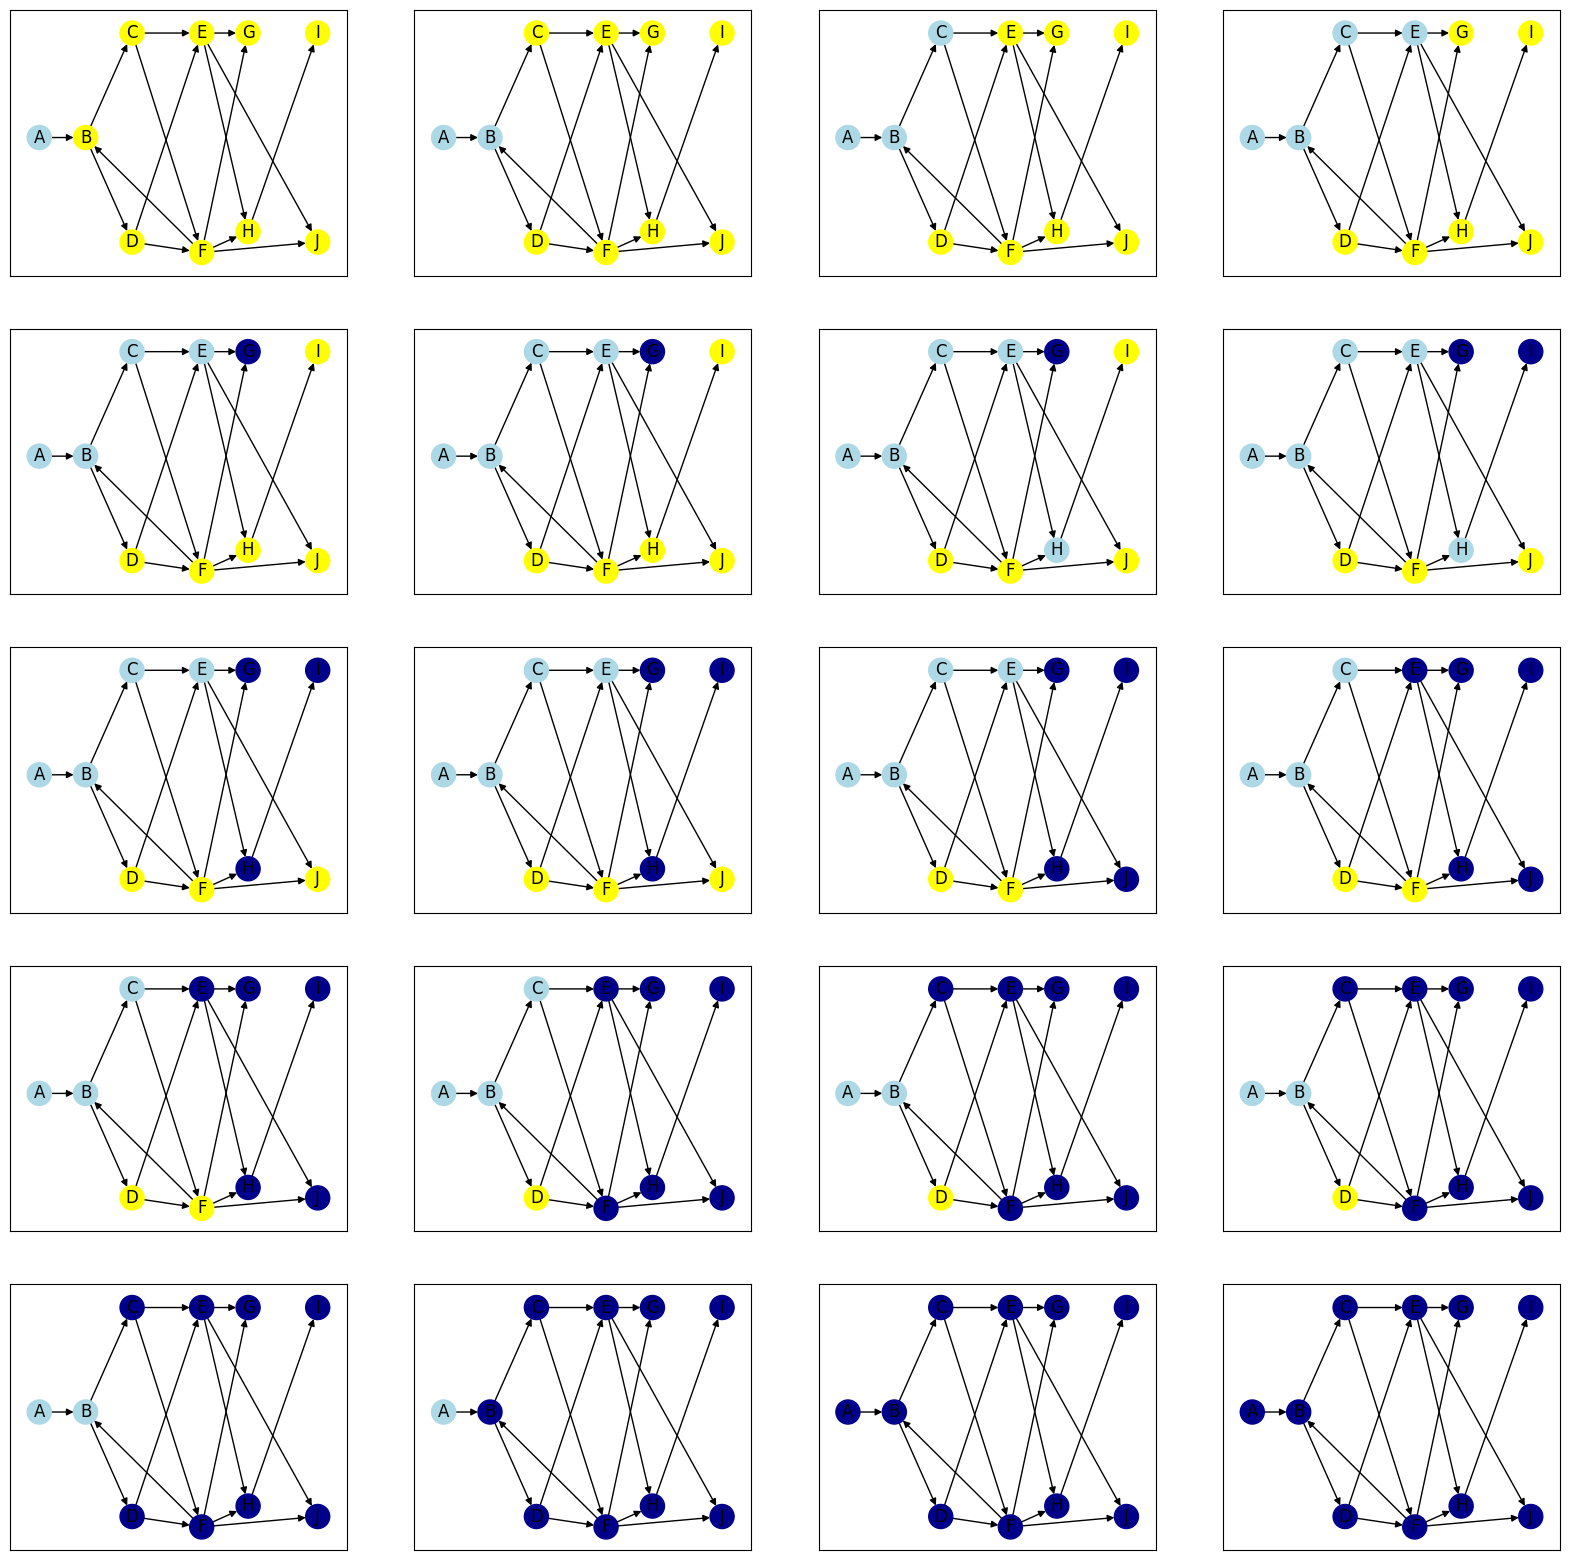

In [16]:
fig, axs = plt.subplots(5, 4, figsize = (20,20))
dfs(graph, axs)
draw_graph(graph, focus_node= None, ax= axs.flat[-1])


In [17]:
%%markdown

### toposort


### toposort


In [18]:
# same graph with F -> B connection removed, yeidling a DAG

c_mat = np.array([  [0,1,0,0,0,0,0,0,0,0],
                    [0,0,1,1,0,0,0,0,0,0],
                    [0,0,0,0,1,1,0,0,0,0],
                    [0,0,0,0,1,1,0,0,0,0],
                    [0,0,0,0,0,0,1,1,0,1],
                    [0,0,0,0,0,0,1,1,0,1],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,1,0],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0]])



In [19]:
graph2 = nx.from_numpy_array(c_mat, create_using= nx.DiGraph)
names = {i:chr(ord('A')+i ) for i in graph2.nodes}
graph2 = nx.relabel_nodes(graph2, names)


toposorted = nx.topological_sort(graph2)

In [20]:
list(toposorted)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'I']

In [21]:
%%markdown

Find back edges


Find back edges


In [22]:
c_mat3 = np.array([ [0,1,0,0,0,0,0,0,0,0],
                    [0,0,1,1,0,0,0,0,0,0],
                    [1,0,0,0,1,1,0,0,0,0],
                    [0,0,0,0,1,1,0,0,0,0],
                    [0,0,0,0,0,0,1,1,0,1],
                    [0,1,0,0,0,0,1,1,0,1],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,1,0],
                    [0,0,1,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0]])
                              
graph3 = setup_graph(c_mat3)

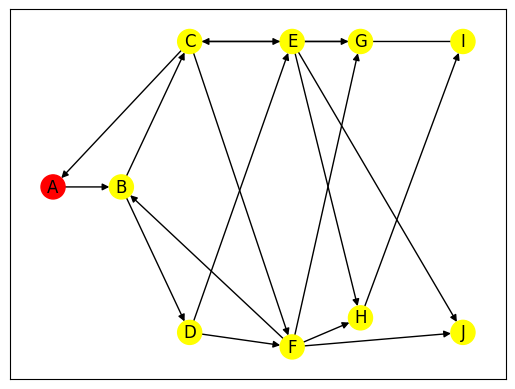

In [23]:
fig, ax = plt.subplots()
draw_graph(graph3, focus_node='A', ax = ax)

In [27]:

def dfs_backedges(graph):
    time = 0
    def dfs_visit(graph, node):
        """Recursive dfs graph traversers
        parameters:
            graph[nx.graph] grap to traverse
            node[str]: current node to traverse from""" 

        nonlocal time
        time += 1
        nx.set_node_attributes(graph, {node: {'discover': time}})
        nx.set_node_attributes(graph, {node: {'color': 'lighblue'}})
        for child in graph.successors(node):
            if graph.nodes[child]['color'] == 'yellow':
                nx.set_node_attributes(graph, {child: {'parent': node}})
                dfs_visit(graph, child)
            else:
                nx.set_edge_attributes(graph, {(node, child): {'backedge': True}})

        nx.set_node_attributes(graph, {node: {'color': 'darkblue'}})
        time +=1 
        nx.set_node_attributes(graph, {node: {'time':time}})  
            
    for vertex in graph:
        if graph.nodes[vertex]['color'] == 'yellow':
            dfs_visit(graph, vertex)
    
    return graph

In [28]:
g = dfs_backedges(graph3)
backedges = [edge for edge in g.edges if g.get_edge_data(*edge).get('backedge')]

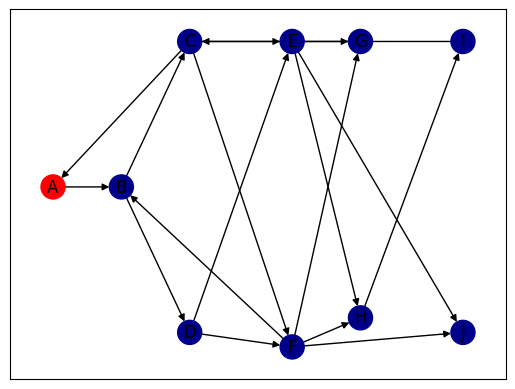

In [41]:

fig, ax = plt.subplots()
draw_graph(graph3, focus_node='A', ax = ax)

In [40]:
backedges

[('C', 'A'),
 ('D', 'E'),
 ('D', 'F'),
 ('F', 'B'),
 ('F', 'G'),
 ('F', 'H'),
 ('F', 'J'),
 ('I', 'C')]

In [42]:
graph3.remove_edges_from(backedges)

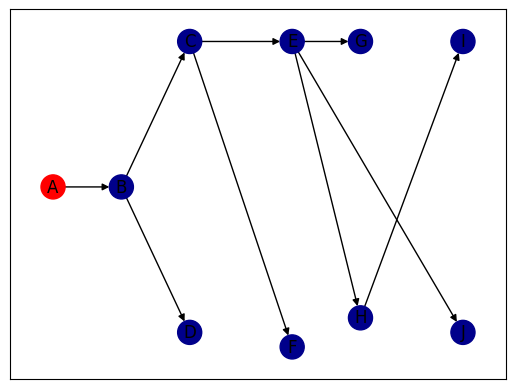

In [43]:

fig, ax = plt.subplots()
draw_graph(graph3, focus_node='A', ax = ax)